# Project 2: New York Taxicab Data Analysis

For this project, your job is to perform exploratory analysis of data collected from New York City taxicabs. Your objective is to understand tipping behavior. To do that, complete the following steps and answer the included questions.

1. Calculate the average trip time and trip distance. -Wesley
2. Calculate the average and the median tip amount, fare amount, surcharge, mta tax, toll amount, and total amount paid. -Wesley
3. Is trip distance correlated with the total amount paid? Is it correlated with the tip amount? -Aaron
4. Drivers can be disambiguated by hack license (hint: groupby). Which drivers earn the most in tips? (report the top 5 tip earners) Who earns the least? (bottom 5) -Aaron
5. Do the drivers that earn the most in tips drive the furthest, or not? -Wesley
6. The average speed for a given trip can be determined by taking the total trip distance and dividing it by the total time taken on the trip (CAUTION: make sure you use the right units - for miles per hour, seconds need to be converted to hours first). Calculate the average speed for each trip. -Aaron
7. Does average speed correlate with the total amount paid? Does it correlate with the tip amount? - Wesley

And finally, a bonus:

8. Which drivers are the fastest, on average? Which drivers are the slowest, on average? Does it appear that faster drivers earn more in tips than slower drivers?

For parts 1 and 2, provide supporting plots. Since this is continuous data, these should be either histograms, boxplots, or kde plots. For parts 3 and 7, provide supporting scatterplots. For part 4, you may optionally provide supporting barcharts.

CAUTION: This data is messy (see my starter code below). Be on the lookout for missing and/or erroneous values. Remove or correct missing values as you see fit, but be sure to explain your reasoning.

## Due Date and Submission Requirements:

On this project you will work with a partner. Partners are listed below. You will only submit one project per team. As with the last project, do all your work in a Jupyter notebook. Include markdown cells with explanation of your analysis as you perform it. When you have completed your work, save as an HTML file (File > Download As > HTML), then submit the file via myCourses. This project is due **March 28, 2017, by 3:39PM**.

## Partners

1. Jacob Mechaber & Briana Garcia
2. Evan O'Reilly & Evan Royer
3. Aaron Broady & Wesley Couturier
4. Patrick Donovan & Brent Groden
5. Angus Jameson & Ryan Kiessling
6. Danielle LeBoeuf & Stephen McCarter
7. Andrew Meyer & Kelvin Nguyen
8. Aurora VanDeWater, Craig Vigneault, & Robert Patenaude

In [1]:
'''
Do not change anything in this cell
'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

% matplotlib inline

In [2]:
'''
Change to your paths
'''

trip = pd.read_csv('./trip_1_h_1e6.csv.gz')
fare = pd.read_csv('./fare_1_h_1e6.csv.gz')

# The two files have the same number of observations

In [3]:
'''
Do not change anything in this cell
'''
print(trip.shape[0])
trip.shape[0] == fare.shape[0]

1000000


True

In [4]:
'''
Do not change anything in this cell
'''
print(trip.columns)
print(fare.columns)

Index(['medallion', 'hack_license', 'vendor_id', 'rate_code',
       'store_and_fwd_flag', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'trip_time_in_secs', 'trip_distance',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude'],
      dtype='object')
Index(['medallion', ' hack_license', ' vendor_id', ' pickup_datetime',
       ' payment_type', ' fare_amount', ' surcharge', ' mta_tax',
       ' tip_amount', ' tolls_amount', ' total_amount'],
      dtype='object')


## Beware data integrity issues

Even the column names have issues. Note the whitespace in front of the column names in the 'fare' dataframe. Let's correct that.

In [5]:
'''
Do not change anything in this cell
'''
corrected_cols = pd.Series(fare.columns)  # can't change columns in place (not 'mutable')
corrected_cols = corrected_cols.apply(lambda x: x.lstrip())  # lstrip removes whitespace on the left
fare.columns = corrected_cols
print("These are the fare columns:")
print(fare.columns)
print()
print("These are the Trip Columns")
print(trip.columns)

These are the fare columns:
Index(['medallion', 'hack_license', 'vendor_id', 'pickup_datetime',
       'payment_type', 'fare_amount', 'surcharge', 'mta_tax', 'tip_amount',
       'tolls_amount', 'total_amount'],
      dtype='object')

These are the Trip Columns
Index(['medallion', 'hack_license', 'vendor_id', 'rate_code',
       'store_and_fwd_flag', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'trip_time_in_secs', 'trip_distance',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude'],
      dtype='object')


## Several columns are duplicates

The following columns are exactly the same in each file.

In [6]:
'''
Do not change anything in this cell
'''
print(sum(trip.medallion != fare.medallion))
print(sum(trip.hack_license != fare.hack_license))
print(sum(trip.vendor_id != fare.vendor_id))
print(sum(trip.pickup_datetime != fare.pickup_datetime))

0
0
0
0


## Good luck!

# 1) Calculate the average trip time and trip distance

The Average time in mintues is:
11.0021936178

The Average trip distance in miles is:
2.49888695377


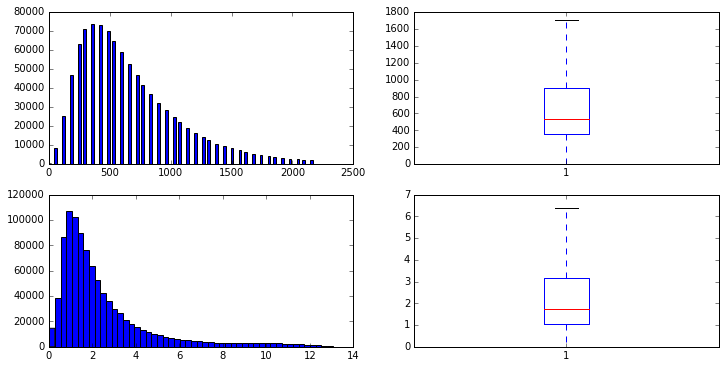

In [28]:
# your code here
temp = trip[((trip.trip_time_in_secs - trip.trip_time_in_secs.mean()).abs() / trip.trip_time_in_secs.std()) <= 3]
temp = temp[temp.trip_time_in_secs > 0]
print('The Average time in mintues is:')
print(temp.trip_time_in_secs.mean() / 60)

# The stuff Below is good!
fig, ax = plt.subplots(2, 2, figsize=(12, 6))
ax[0][0].hist(temp['trip_time_in_secs'], bins=100)
ax[0][1].boxplot(trip['trip_time_in_secs'], showfliers=False)

temp_2 = trip[((trip.trip_distance - trip.trip_distance.mean()).abs() / trip.trip_distance.std()) <= 3]
temp_2 = temp_2[temp_2.trip_distance > 0]

ax[1][0].hist(temp_2['trip_distance'], bins=50)
ax[1][1].boxplot(trip['trip_distance'], showfliers=False)

print()
print("The Average trip distance in miles is:")
print(temp_2.trip_distance.mean())

According to the information from the trip.csv:
 * The Average trip time is 11 Minutes
 * The Average distance is 2.50 Miles

As we can see, the time graphs are very similar to distance traveled. This is to be expected, as the further you go, the longer the time it will take.
 

# 2) Calculate the average and the median tip amount, fare amount, surcharge, mta tax, toll amount, and total amount paid

In [37]:
fare_df = pd.DataFrame(fare)
fare[[' fare_amount', ' surcharge', ' tip_amount', ' total_amount', ' mta_tax', ' tolls_amount']].describe()


,fare_amount,surcharge,tip_amount,total_amount,mta_tax,tolls_amount
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,12.012599,0.323555,1.322969,14.396471,0.498478,0.238870
std,10.170447,0.373471,2.143718,12.121510,0.027544,1.126876
min,2.500000,0.000000,0.000000,2.500000,0.000000,0.000000
25%,6.500000,0.000000,0.000000,7.700000,0.500000,0.000000
50%,9.000000,0.000000,1.000000,10.700000,0.500000,0.000000
75%,13.500000,0.500000,2.000000,16.000000,0.500000,0.000000
max,460.000000,1.000000,177.000000,460.500000,0.500000,20.000000


In [43]:
# your code here
tip_amount = fare[((fare[' tip_amount'] - fare[' tip_amount'].mean()).abs() / fare[' tip_amount'].std()) <= 3]
fare_amount = fare[((fare[' fare_amount'] - fare[' fare_amount'].mean()).abs() / fare[' fare_amount'].std()) <= 3]
surcharge = fare[((fare[' surcharge'] - fare[' surcharge'].mean()).abs() / fare[' surcharge'].std()) <= 3]
mta_tax = fare[((fare[' mta_tax'] - fare[' mta_tax'].mean()).abs() / fare[' mta_tax'].std()) <= 3]
toll_amount = fare[((fare[' tolls_amount'] - fare[' tolls_amount'].mean()).abs() / fare[' tolls_amount'].std()) <= 3]
total_amount = fare[((fare[' total_amount'] - fare[' total_amount'].mean()).abs() / fare[' total_amount'].std()) <= 3]

print('The Average fare amount is:')
print(fare_amount[' fare_amount'].mean())
print('The Median fare amount is:')
print(fare_amount[' fare_amount'].median())
print()
print('The Average surcharge amount is:')
print(surcharge[' surcharge'].mean())
print('The Median surcharge amount is:')
print(surcharge[' surcharge'].median())
print()
print('The Average mta tax amount is:')
print(mta_tax[' mta_tax'].mean())
print('The Median mta_tax amount is:')
print(mta_tax[' mta_tax'].median())
print()
print('The Average toll_amount amount is:')
print(toll_amount[' tolls_amount'].mean())
print('The Median tolls amount is:')
print(toll_amount[' tolls_amount'].median())
print()
print('The Average total amount amount is:')
print(total_amount[' total_amount'].mean())
print('The Median total amount is:')
print(total_amount[' total_amount'].median())
print()
print('The Average Tip amount is:')
print(tip_amount[' tip_amount'].mean())
print('The Median Tip amount is:')
print(tip_amount[' tip_amount'].median())

The Average fare amount is:
10.8112836622
The Median fare amount is:
8.5

The Average surcharge amount is:
0.323555
The Median surcharge amount is:
0.0

The Average mta tax amount is:
0.5
The Median mta_tax amount is:
0.5

The Average toll_amount amount is:
0.00106280573163
The Median tolls amount is:
0.0

The Average total amount amount is:
12.9367229808
The Median total amount is:
10.5

The Average Tip amount is:
1.12127066686
The Median Tip amount is:
0.75
